# <div style="text-align: center; background-color: orange; color: white; padding: 14px; line-height: 1;border-radius:10px">Classification on Spam Email</div>


![image](https://gridinsoft.com/blogs/wp-content/uploads/2017/07/spam-email.png)

> <h2> 1. About Dataset </h2>

- #### The dataset titled 'Spam Email' comprises two columns: 'Category' and 'Message'. The 'Category' column indicates whether an email is categorized as spam or ham (non-spam). The 'Message' column contains the contextual content of the email. This dataset provides information on the classification of emails as spam or ham based on their respective message content.

## <b>2. Objectives:</b>

 ### The main objectives of this notebook are as follows:

- ####  <b>Exploration:</b> Analyze and understand the distribution of each column in the dataset, examining the characteristics of the 'Category' (spam or ham) and 'Message' columns.

- ####  <b>Ham Message Analysis:</b> Perform an in-depth analysis of the non-spam (ham) messages, investigating their patterns, characteristics, and insights.

- ####  <b>Spam Message Analysis:</b> Conduct a comprehensive analysis of the spam messages, examining their patterns, characteristics, and identifying common trends or indicators of spam.

- ####  <b>Binary Classification:</b> Implement binary classification models without any tuned machine learning algorithms, comparing their performance. Additionally, explore the use of a neur##al network model for classification.

### These objectives aim to provide a thorough understanding of the dataset, explore the distribution of data, and analyze both spam and non-spam messages separately. Furthermore, the notebook aims to compare different classification models and evaluate their effectiveness in distinguishing between spam and ham messages.

<a id="top"></a>
> <div class="list-group" id="list-tab" role="tablist">
 <h2>3.Table of Contents</h2>
    
   * [1. Load necessary libraries and dataset](#1)
   * [2.EDA on features (length added)](#2)
    - [2.1. Distribution of each categories](#2.1)
    - [2.2. Length distribution of spam & ham meesage](#2.2)
   * [3. Ham & Spam Analysis](#3)
    - [3.1. define functions](#3.1)  
    - [3.2. Term frequency by ham message](#3.2)
        - [3.2.1. bar plot of ham message](#3.2.1)
        - [3.2.2. Word cloud of ham message](#3.2.2)
    - [3.3. Term frequency by spam message](#3.3)
        - [3.3.1. bar plot of spam message](#3.3.1)
        - [3.3.2. Word cloud of spam message](#3.3.2)
   * [4. Text preprocessing for spam email detection](#4)
        - [4.1. define preprocessing function](#4.1)  
        - [4.2. CountVectorizer](#4.2) 
        - [4.3. tf-idf transformer](#4.3) 
        - [4.4. Train-test split](#4.4) 
   * [5. Text Classification](#5)
       - [5.1. Define & Fit classifiers](#5.1)
       - [5.2.ML: Compare Evaluation Matrix](#5.2)
       - [5.3. ML: Cross Validation](#5.3)
       - [5.4. Voting classifier Added (cv)](#5.4)
       - [5.5. Voting Classifier: Model Evaluation](#5.5)
       - [5.6. LSTM Model](#5.6)

### <div style="text-align: center; background-color: orange; color: white; padding: 14px; line-height: 1;border-radius:10px">Import The Libraries</div>


In [64]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd  # For working with data frames
import numpy as np  # For numerical operations

# Importing libraries for visualization
import seaborn as sns  # Seaborn is a high-level interface for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib's pyplot module for plotting
import missingno as msno  # Library for visualizing missing data patterns
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download()
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <div style="text-align: center; background-color: orange; color: white; padding: 14px; line-height: 1;border-radius:10px">Data Wrangling And EDA And Feature Extraction</div>


In [65]:
# loading the DataSet
df=pd.read_csv('./spam.csv')
# head of the Data
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
# Shape of the Data
df.shape

(5572, 2)

In [67]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


The Sum Of Missing Values per Column are Category    0
Message     0
dtype: int64
Category    0
Message     0
dtype: int64


Text(0.5, 1.0, 'Visualising Missing Numbers')

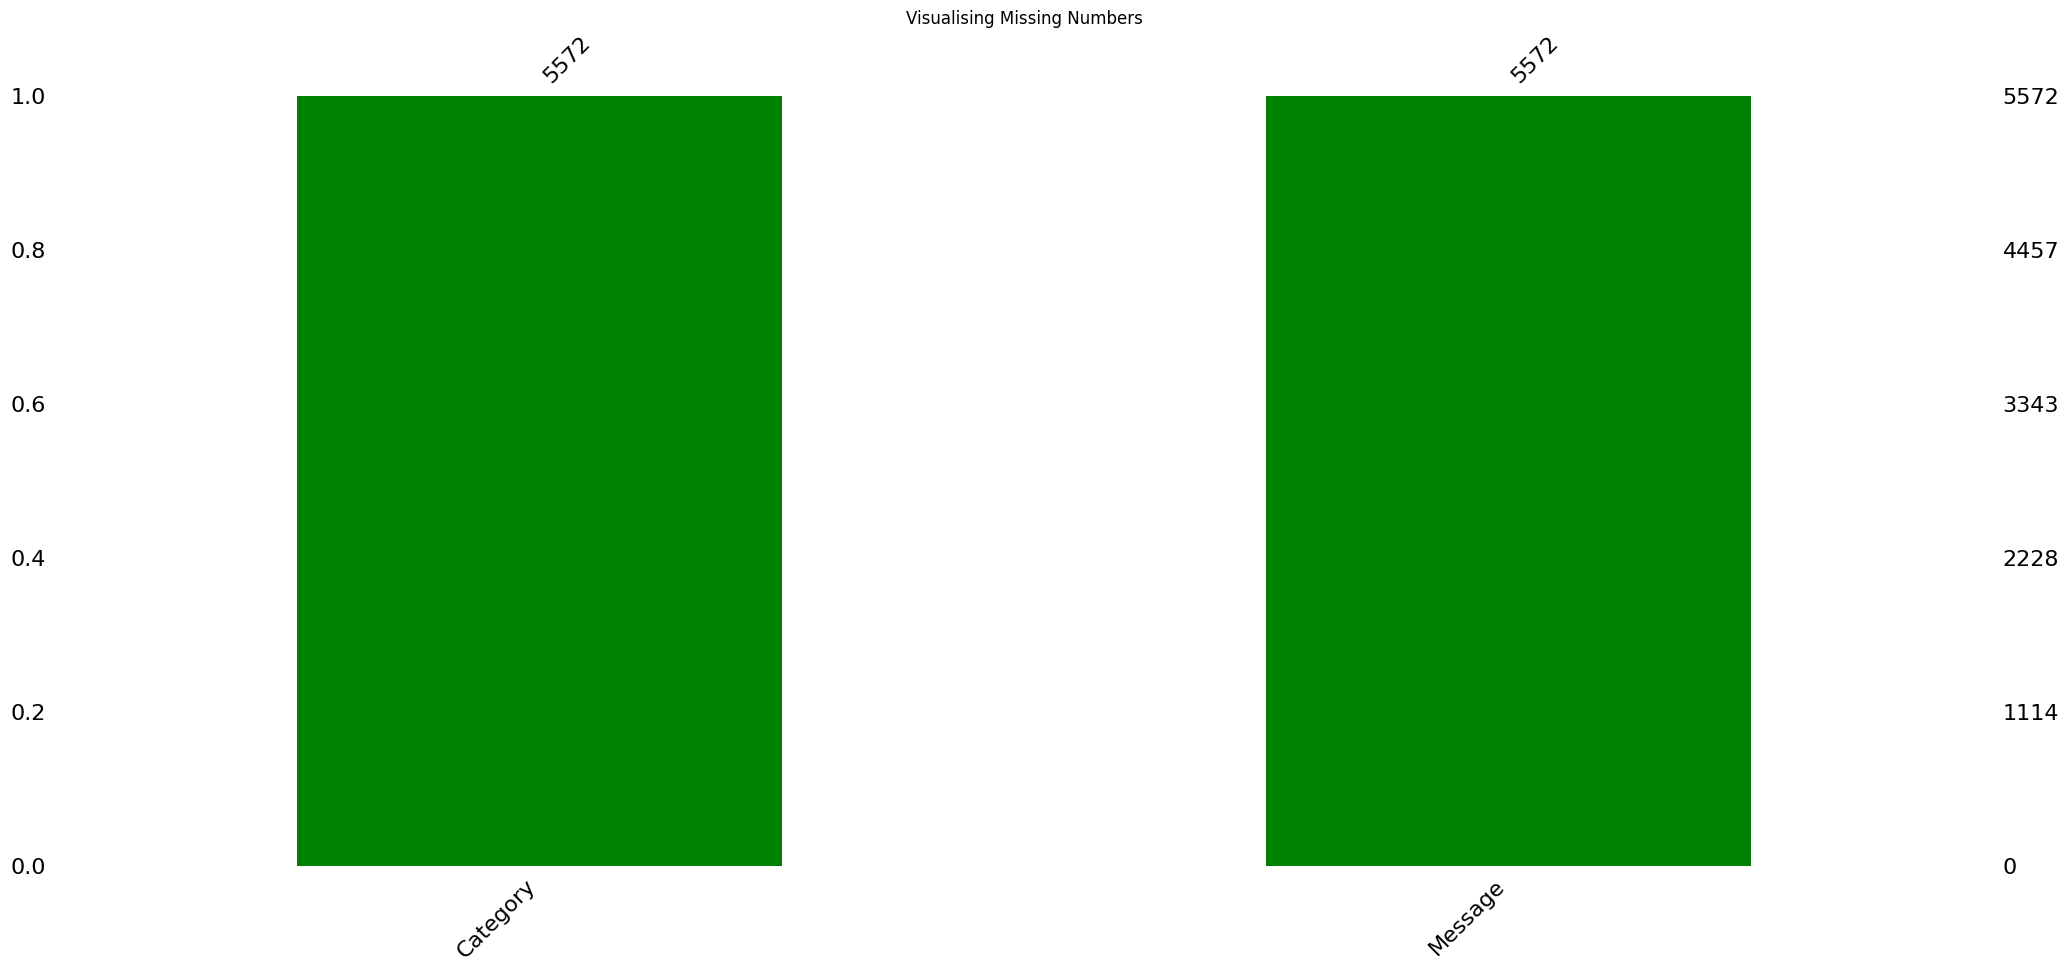

In [68]:
# Checking Null values
print('The Sum Of Missing Values per Column are' ,df.isnull().sum())
print(df.isnull().sum().sort_values(ascending=False))
msno.bar(df,color='green').set_title('Visualising Missing Numbers')

In [69]:
# printing the duplicate Values
df['Message'].duplicated().sum()
# Renaming The columns
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [70]:
# encoding labels
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [71]:
# dropping Duplicates
df=df.drop_duplicates(keep='first')
# checking values counts for target column 
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

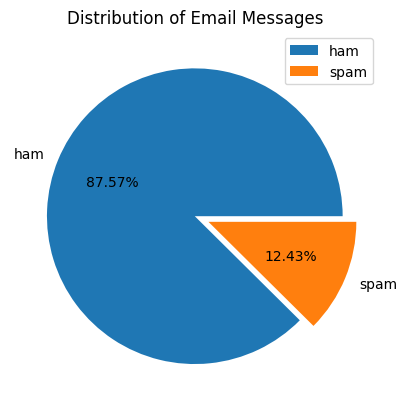

In [72]:
# ploting a pie chart for distribution
# Data
values = df['target'].value_counts()
labels = ['ham', 'spam']
explode = [0, 0.1]  # Explode the 'spam' slice

# Plotting the pie chart
plt.pie(values, labels=labels, explode=explode, autopct='%0.2f%%')

# Chart customization
plt.title("Distribution of Email Messages")
plt.legend(loc="best")

# Display the chart
plt.show()

- ###  Data Is imbalnced

In [73]:
# Calculate the length of each text and add it as a new column 'num_char'
df['num_char'] = [len(text) for text in df['text']]
# Tokenize the text and count the number of words, then add it as a new column 'num_words'
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Comment: This code utilizes the NLTK library to tokenize each text in the 'text' column of the DataFrame.
# The `nltk.word_tokenize()` function is applied to each text, which splits it into individual words.
# The resulting list of words is then passed to the `len()` function to calculate the number of words.
# The calculated number of words is assigned to the 'num_words' column in the DataFrame.

# Tokenize the text and count the number of sentences, then add it as a new column 'num_sent'
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Comment: This code utilizes the NLTK library to tokenize each text in the 'text' column of the DataFrame.
# The `nltk.sent_tokenize()` function is applied to each text, which splits it into individual sentences.
# The resulting list of sentences is then passed to the `len()` function to calculate the number of sentences.
# The calculated number of sentences is assigned to the 'num_sent' column in the DataFrame.

In [74]:
# head of the data
df.head().style.background_gradient(cmap='viridis')

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1


In [75]:
# descriptive Stats
df.describe().style.background_gradient(cmap='viridis')

,target,num_char,num_words,num_sent
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [76]:
df[df['target']==0].describe().style.background_gradient(cmap='viridis')

,target,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000,4516.000000
mean,0.000000,70.869353,17.267715,1.827724
std,0.000000,56.708301,13.588065,1.394338
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,34.000000,8.000000,1.000000
50%,0.000000,53.000000,13.000000,1.000000
75%,0.000000,91.000000,22.000000,2.000000
max,0.000000,910.000000,220.000000,38.000000


In [77]:
# Deviding Data Set on the basis of Ham And Spam
Ham=df[df['target']==0]
Spam=df[df['target']!=0]

In [78]:
# Describing Ham Data Set
Ham.describe().describe().style.background_gradient(cmap='viridis')

,target,num_char,num_words,num_sent
count,8.000000,8.000000,8.000000,8.000000
mean,564.500000,716.697207,601.356972,570.277758
std,1596.647112,1564.499245,1583.432760,1594.364115
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,48.250000,11.750000,1.000000
50%,0.000000,63.788827,15.427890,1.611031
75%,0.000000,295.750000,71.500000,11.000000
max,4516.000000,4516.000000,4516.000000,4516.000000


In [79]:
# describing Spam Data set
Spam.describe().style.background_gradient(cmap='viridis')

,target,num_char,num_words,num_sent
count,641.000000,641.000000,641.000000,641.000000
mean,1.000000,137.118565,27.667707,2.970359
std,0.000000,30.399707,7.103501,1.485575
min,1.000000,7.000000,2.000000,1.000000
25%,1.000000,130.000000,25.000000,2.000000
50%,1.000000,148.000000,29.000000,3.000000
75%,1.000000,157.000000,32.000000,4.000000
max,1.000000,223.000000,46.000000,9.000000


### <div style="text-align: center; background-color: orange; color: white; padding: 14px; line-height: 1;border-radius:10px">Visualistion </div>


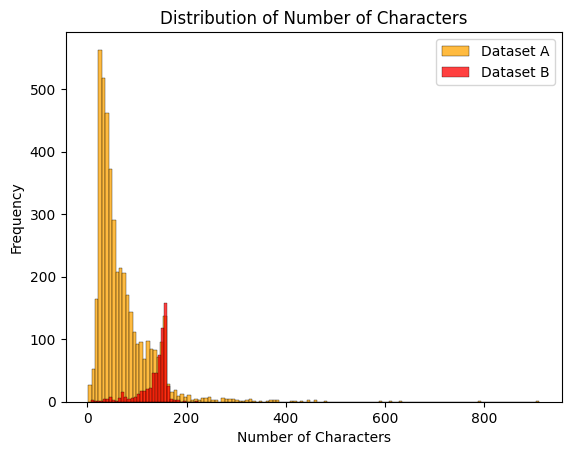

In [80]:
# Plotting the histograms
sns.histplot(data=Ham, x='num_char', color='orange', label='Dataset A')
sns.histplot(data=Spam, x='num_char', color='red', label='Dataset B')

# Chart customization
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters')
plt.legend()

# Display the chart
plt.show()

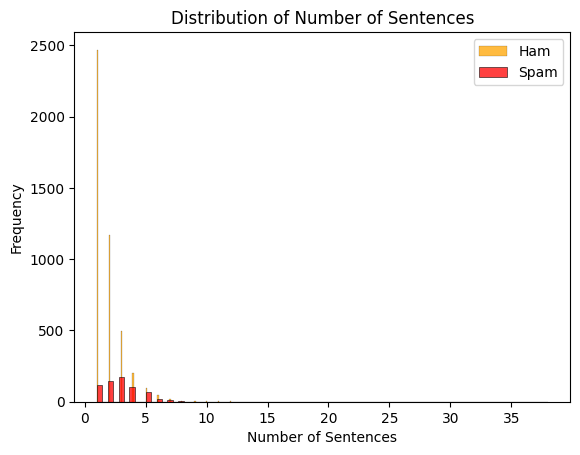

In [81]:
# Plotting the histograms
sns.histplot(data=Ham, x='num_sent', color='orange', label='Ham')
sns.histplot(data=Spam, x='num_sent', color='red', label='Spam')

# Chart customization
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Sentences')
plt.legend()

# Display the chart
plt.show()

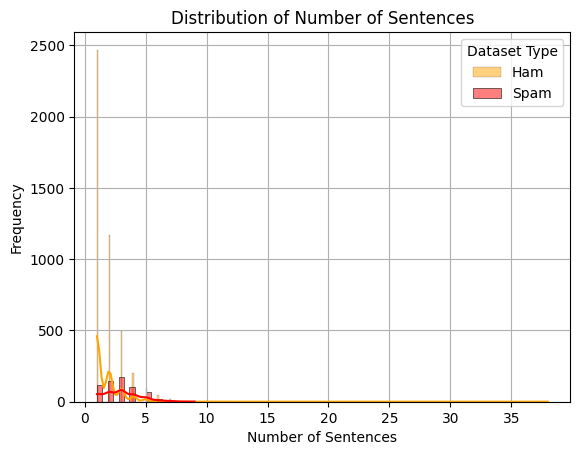

In [82]:
# Plotting the histograms
sns.histplot(data=Ham, x='num_sent', color='orange', label='Ham', kde=True)
sns.histplot(data=Spam, x='num_sent', color='red', label='Spam', kde=True)

# Chart customization
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Sentences')
plt.legend(title='Dataset Type')
plt.grid(True)

# Display the chart
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


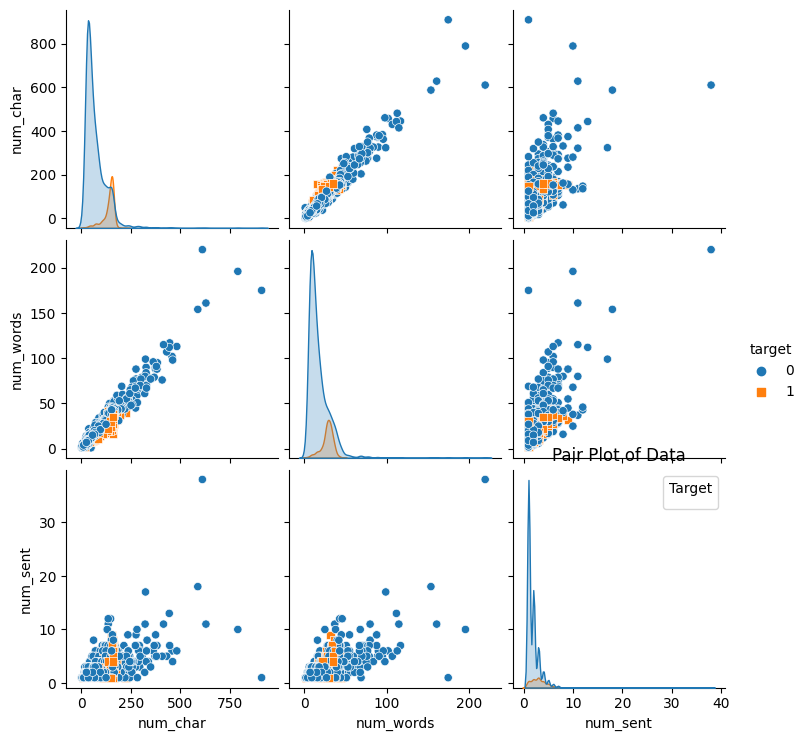

In [83]:
import seaborn as sns

# Plotting the pair plot
sns.pairplot(df, hue='target', markers=['o', 's'])

# Chart customization
plt.title('Pair Plot of Data')
plt.legend(title='Target')
plt.grid(True)

# Display the chart
plt.show()

In [84]:
df

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


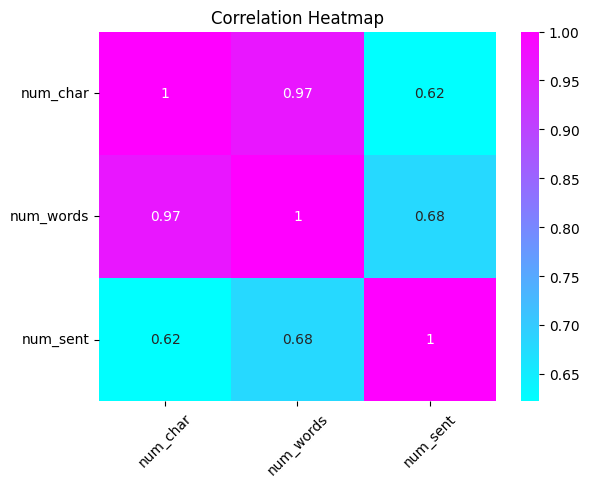

In [85]:
# Creating the correlation matrix
correlation_matrix = df[['num_char','num_words','num_sent']].corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='cool')

# Chart customization
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the chart
plt.show()

### <div style="text-align: center; background-color: orange; color: white; padding: 14px; line-height: 1;border-radius:10px">Text PreProcesing </div>


In [86]:
ps=PorterStemmer()
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        # Check if the token is alphanumeric
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        # Check if the token is not a stop word or punctuation
        if i not in stopwords.words() and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        # Apply stemming to the token
        y.append(ps.stem(i))
    
    return " ".join(y)

In [87]:
# Apply the transformation and create the new column
df['transformed_text'] = df['text'].apply(transform_text)

# Print the updated DataFrame
print(df)

      target                                               text  num_char   
0          0  Go until jurong point, crazy.. Available only ...       111  \
1          0                      Ok lar... Joking wif u oni...        29   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3          0  U dun say so early hor... U c already then say...        49   
4          0  Nah I don't think he goes to usf, he lives aro...        61   
...      ...                                                ...       ...   
5567       1  This is the 2nd time we have tried 2 contact u...       160   
5568       0               Will ü b going to esplanade fr home?        36   
5569       0  Pity, * was in mood for that. So...any other s...        57   
5570       0  The guy did some bitching but I acted like i'd...       125   
5571       0                         Rofl. Its true to its name        26   

      num_words  num_sent                                   transformed_tex

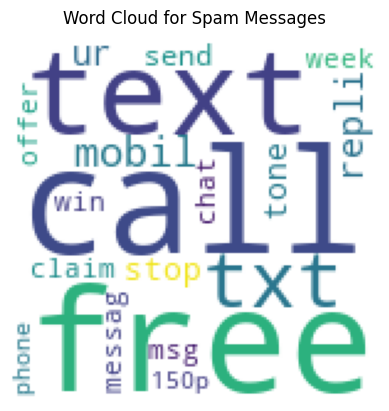

In [88]:
wc= WordCloud(width=150,height=150,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)# Initialize WordCloud object with desired settings
wc = WordCloud(width=150, height=150, min_font_size=10, background_color='white')

# Generate the word cloud for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
plt.imshow(spam_wc)

# Add a title to the plot
plt.title("Word Cloud for Spam Messages")

# Remove the axis labels
plt.axis("off")

# Show the plot
plt.show()

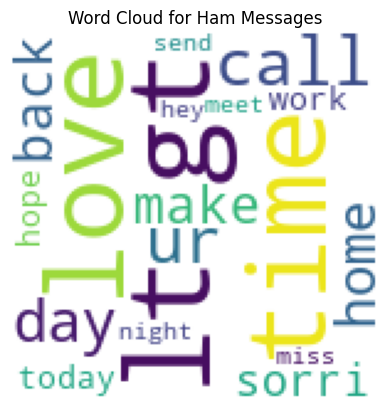

In [89]:

# Initialize WordCloud object with desired settings
wc = WordCloud(width=150, height=150, min_font_size=10, background_color='white')

# Generate the word cloud for ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
plt.imshow(ham_wc)

# Add a title to the plot
plt.title("Word Cloud for Ham Messages")

# Remove the axis labels
plt.axis("off")

# Show the plot
plt.show()

In [90]:
# Create an empty list to store the spam corpus
spam_corpus = []

# Iterate over each message in the DataFrame where target is not equal to 0 (indicating spam messages)
for message in df[df['target'] != 0]['transformed_text'].tolist():
    # Split the message into individual words
    for word in message.split():
        # Append each word to the spam_corpus list
        spam_corpus.append(word)


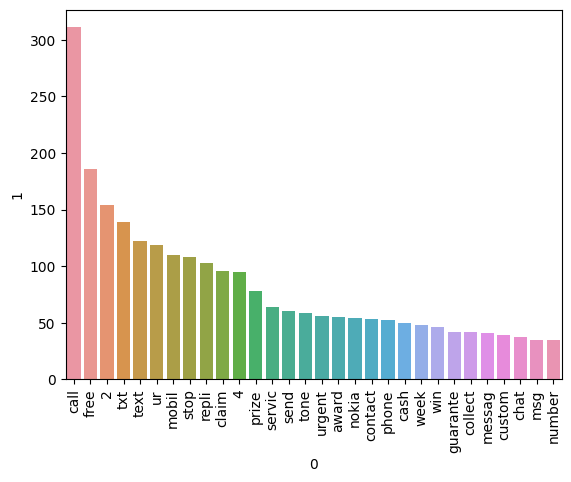

In [91]:

# Count the occurrences of each word in the spam_corpus list
word_counts = Counter(spam_corpus)

# Create a DataFrame with the most common 30 words and their counts
most_common_words_df = pd.DataFrame(word_counts.most_common(30))

# Create a bar plot using seaborn's barplot
sns.barplot(x=most_common_words_df[0],y= most_common_words_df[1])

# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [92]:
# Create an empty list to store the ham corpus
ham_corpus = []

# Iterate over each message in the DataFrame where target is equal to 0 (indicating ham messages)
for message in df[df['target'] == 0]['transformed_text'].tolist():
    # Split the message into individual words
    for word in message.split():
        # Append each word to the ham_corpus list
        ham_corpus.append(word)

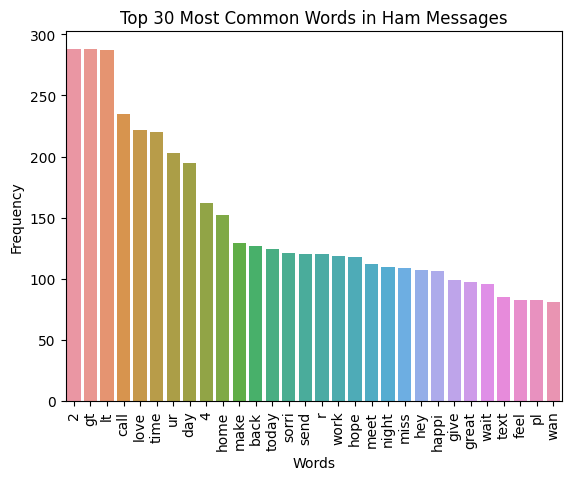

In [93]:
# Count the occurrences of each word in the ham_corpus list
word_counts = Counter(ham_corpus)

# Create a DataFrame with the most common 30 words and their counts
most_common_words_df = pd.DataFrame(word_counts.most_common(30))

# Create a bar plot using seaborn's barplot
sns.barplot(x=most_common_words_df[0], y=most_common_words_df[1])

# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Add labels and title to the plot
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Ham Messages")

# Show the plot
plt.show()

## <div style="text-align: center; background-color: orange; color: white; padding: 14px; line-height: 1;border-radius:10px">Model Building </div>


Using Count Vectorizer

In [94]:
# Create an instance of CountVectorizer
Cv = CountVectorizer()

# Apply CountVectorizer to transform the text data into a feature matrix
X = Cv.fit_transform(df['transformed_text']).toarray()

In [95]:
# shape of X
X.shape

(5157, 6430)

In [96]:
# Extracting Y
Y=df['target'].values

In [97]:
# checking y
Y

array([0, 0, 1, ..., 0, 0, 0])

In [98]:
# Split the data into training and testing sets
# X: feature matrix, Y: target variable
# test_size: proportion of the data to be used for testing (20% in this case)
# random_state: seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create instances of the Naive Bayes models
gnb = GaussianNB()       # Gaussian Naive Bayes
mnb = MultinomialNB()    # Multinomial Naive Bayes
bnb = BernoulliNB()      # Bernoulli Naive Bayes

In [99]:
# Fit the Gaussian Naive Bayes model to the training data
gnb.fit(X_train, Y_train)

# Use the trained model to predict the target variable for the test data
Y_pred1 = gnb.predict(X_test)

# Calculate and print the accuracy score of the model
print(accuracy_score(Y_test, Y_pred1))

# Calculate and print the confusion matrix of the model
print(confusion_matrix(Y_test, Y_pred1))

# Calculate and print the precision score of the model
print(precision_score(Y_test, Y_pred1))


0.8071705426356589
[[720 185]
 [ 14 113]]
0.37919463087248323


In [100]:
# Fit the Multinomial Naive Bayes model to the training data
mnb.fit(X_train, Y_train)

# Use the trained model to predict the target variable for the test data
Y_pred2 = mnb.predict(X_test)

# Calculate and print the accuracy score of the model
print(accuracy_score(Y_test, Y_pred2))

# Calculate and print the confusion matrix of the model
print(confusion_matrix(Y_test, Y_pred2))

# Calculate and print the precision score of the model
print(precision_score(Y_test, Y_pred2))

0.9709302325581395
[[887  18]
 [ 12 115]]
0.8646616541353384


In [101]:
# Fit the Bernoulli Naive Bayes model to the training data
bnb.fit(X_train, Y_train)

# Use the trained model to predict the target variable for the test data
Y_pred3 = bnb.predict(X_test)

# Calculate and print the accuracy score of the model
print(accuracy_score(Y_test, Y_pred3))

# Calculate and print the confusion matrix of the model
print(confusion_matrix(Y_test, Y_pred3))

# Calculate and print the precision score of the model
print(precision_score(Y_test, Y_pred3))

0.9699612403100775
[[902   3]
 [ 28  99]]
0.9705882352941176


Using TFIDF

In [102]:
# Create an instance of CountVectorizer
tfidf= TfidfVectorizer()

# Apply CountVectorizer to transform the text data into a feature matrix
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [103]:
# shape of X
X.shape

(5157, 6430)

In [104]:
# Extracting Y
Y=df['target'].values

In [105]:
# checking y
Y

array([0, 0, 1, ..., 0, 0, 0])

In [106]:
# Fit the Gaussian Naive Bayes model to the training data
gnb.fit(X_train, Y_train)

# Use the trained model to predict the target variable for the test data
Y_pred4 = gnb.predict(X_test)

# Calculate and print the accuracy score of the model
print(accuracy_score(Y_test, Y_pred4))

# Calculate and print the confusion matrix of the model
print(confusion_matrix(Y_test, Y_pred4))

# Calculate and print the precision score of the model
print(precision_score(Y_test, Y_pred4))

0.8071705426356589
[[720 185]
 [ 14 113]]
0.37919463087248323


In [107]:
# Fit the Gaussian Naive Bayes model to the training data
mnb.fit(X_train, Y_train)

# Use the trained model to predict the target variable for the test data
Y_pred5 = mnb.predict(X_test)

# Calculate and print the accuracy score of the model
print(accuracy_score(Y_test, Y_pred5))

# Calculate and print the confusion matrix of the model
print(confusion_matrix(Y_test, Y_pred5))

# Calculate and print the precision score of the model
print(precision_score(Y_test, Y_pred5))

0.9709302325581395
[[887  18]
 [ 12 115]]
0.8646616541353384


In [108]:
# Fit the Bernoulli Naive Bayes model to the training data
bnb.fit(X_train, Y_train)

# Use the trained model to predict the target variable for the test data
Y_pred6 = bnb.predict(X_test)

# Calculate and print the accuracy score of the model
print(accuracy_score(Y_test, Y_pred6))

# Calculate and print the confusion matrix of the model
print(confusion_matrix(Y_test, Y_pred6))

# Calculate and print the precision score of the model
print(precision_score(Y_test, Y_pred6))

0.9699612403100775
[[902   3]
 [ 28  99]]
0.9705882352941176


### Considering the performance evaluation, the Multinomial Naive Bayes model trained with the TF-IDF vectorizer yielded the highest precision score among the evaluated models. Therefore, we will select this model as the preferred one for our task.

In [109]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))